In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('spotify2019.csv')

In [4]:
data.head(10)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.837,0
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.934,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000,9,0.1070,-12.569,1,0.4510,142.111,4,0.180,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847,8,0.0959,-9.008,1,0.0551,120.034,4,0.622,0
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910,11,0.0727,-8.932,1,0.0697,124.031,4,0.944,0


In [5]:
print(data.isnull().sum())

artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


In [6]:
data.dropna(inplace=True)

In [7]:
duplicates = data[data.duplicated(subset=['track_id'], keep=False)]
print(f"Jumlah duplikat: {len(duplicates)}")

Jumlah duplikat: 665


In [8]:
# Drop dupliactes by 'track_id'
data = data.drop_duplicates(subset=['track_id'], keep='first')

In [9]:
# Numerical feature
data_numeric = data.select_dtypes(include=['float64', 'int64'])

In [10]:
data['tempo'] = pd.qcut(data['tempo'], q=5, labels=False) # tempo is bined into 5 bin

In [11]:
data['duration_ms'] = data['duration_ms'].apply(lambda x: x / 60000) #convert miliseconds to minutes
data.rename(columns={'duration_ms': 'duration_min'}, inplace=True)

In [12]:
import numpy as np

data['key_sin'] = np.sin(2 * np.pi * data['key']/12) # mapping key to x y coordinates in circle unit
data['key_cos'] = np.cos(2 * np.pi * data['key']/12)

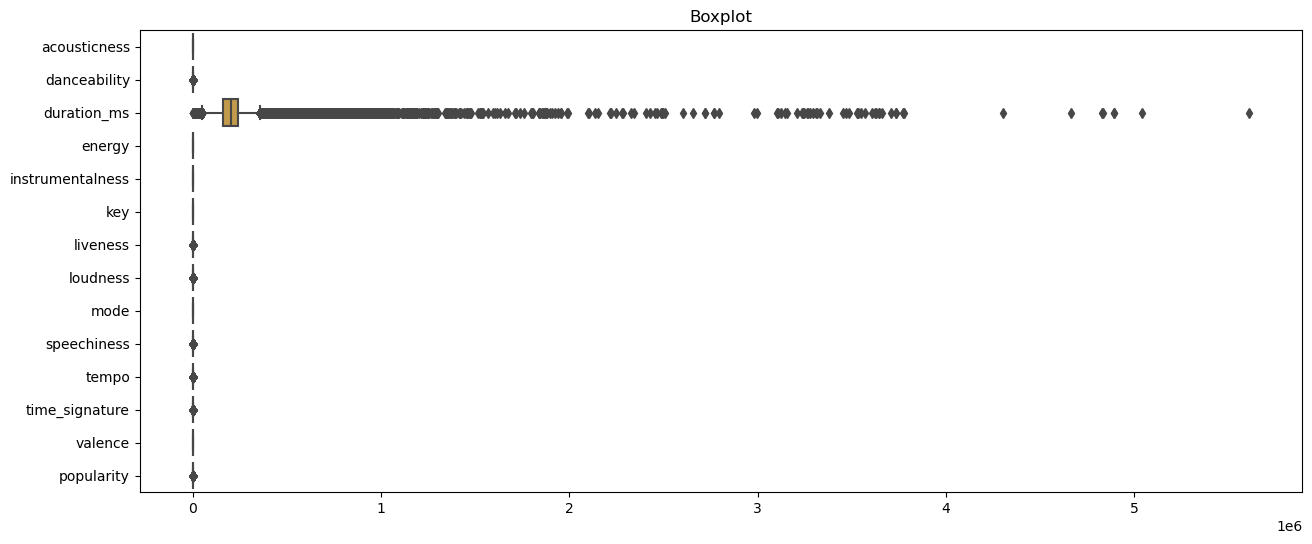

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=data_numeric, orient='h')
plt.title('Boxplot')
plt.show()

In [14]:
#Q1 = data_numeric.quantile(0.25)
#Q3 = data_numeric.quantile(0.75)
#IQR = Q3 - Q1

#data = data[~((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True) # remove outlier based on 1.5 * IQR range
#data

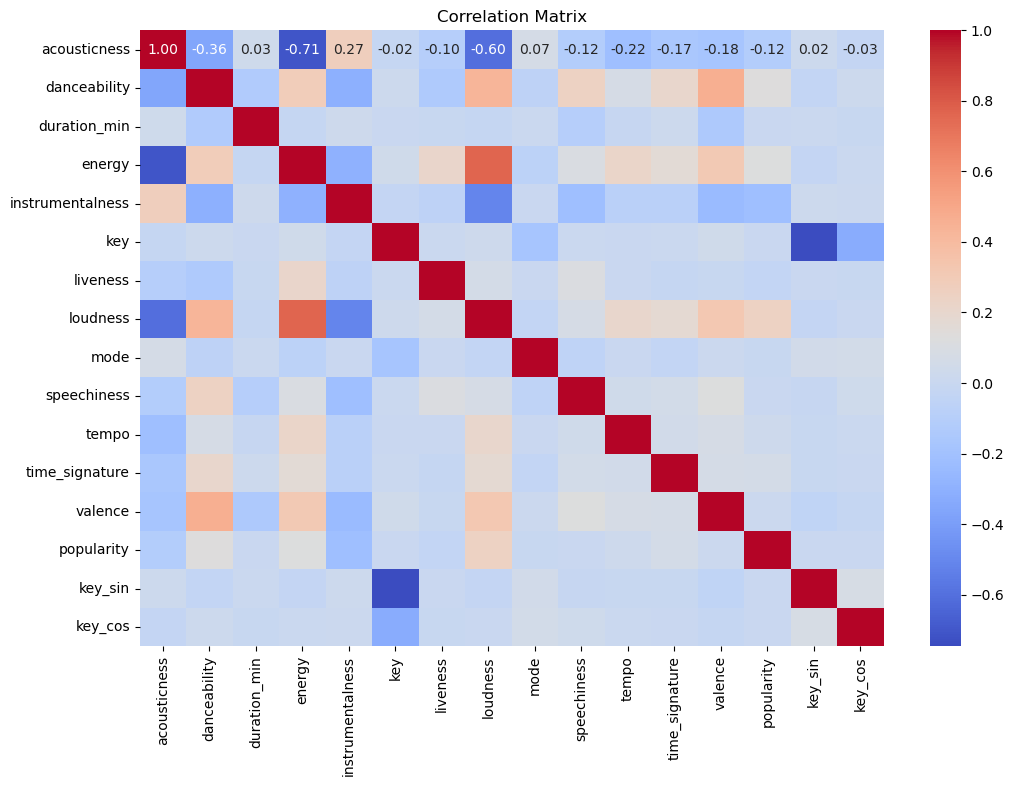

In [15]:
data_num = data.select_dtypes(include=['float64', 'int64']) # correlation between numeric features
correlation_matrix = data_num.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

IndexError: index 5 is out of bounds for axis 0 with size 5

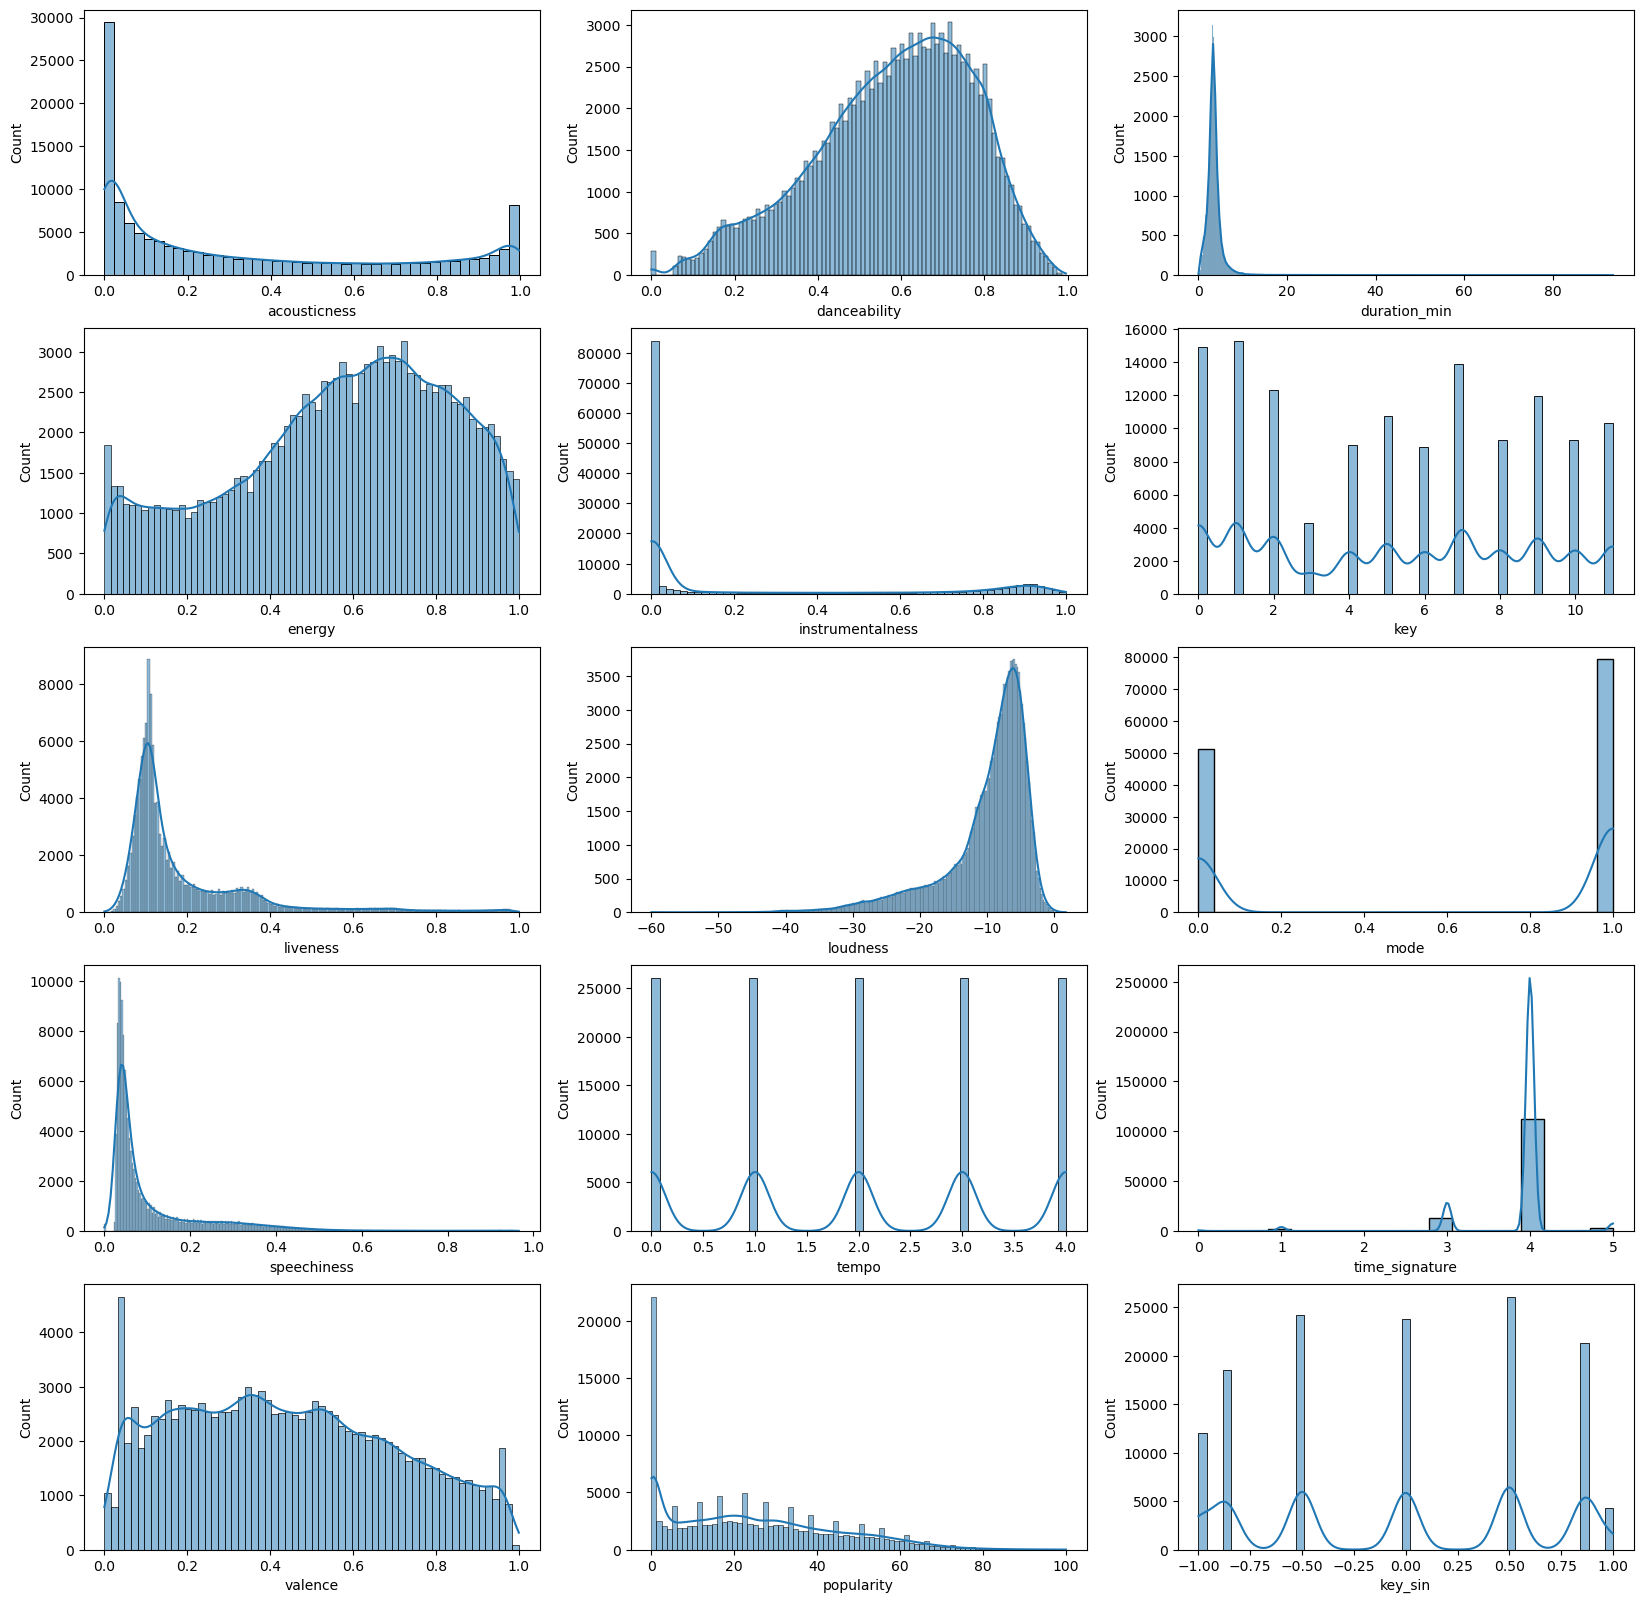

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20)) # display histogram distribution

for i, col in enumerate(data_num.columns):
  sns.histplot(data=data_num, x=col, kde=True, ax=axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

data_numeric = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_scaled)

# Save PCA Data
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])


In [19]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca_df)


data_pca_df['cluster'] = dbscan_labels


In [ ]:
for eps in [0.3, 0.5, 0.7, 1.0]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_pca_df[['PCA1', 'PCA2']])
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps={eps}, min_samples={min_samples} --> clusters={n_clusters}, noise={n_noise}")


eps=0.3, min_samples=3 --> clusters=1, noise=8
eps=0.3, min_samples=5 --> clusters=1, noise=10
eps=0.3, min_samples=10 --> clusters=1, noise=14
eps=0.5, min_samples=3 --> clusters=1, noise=3
eps=0.5, min_samples=5 --> clusters=1, noise=3
eps=0.5, min_samples=10 --> clusters=1, noise=4


MemoryError: bad allocation

In [ ]:
# Visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='cluster',
    palette='Set2',
    data=data_pca_df,
    legend='full',
    alpha=0.7
)
plt.title('Visualisasi Hasil Clustering dengan DBSCAN (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


NameError: name 'plt' is not defined